In [1]:
!pip3 install opencv-python
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/central/software/python/3.7.0/bin/python3.7 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/central/software/python/3.7.0/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from numpy import asarray
import PIL
from PIL import Image

import cv2

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, Conv2D


In [3]:
# Load data

train = pd.read_csv('/groups/CS156b/data/student_labels/train.csv')

test_ids = pd.read_csv('/groups/CS156b/data/student_labels/test_ids.csv')

solution_ids = pd.read_csv('/groups/CS156b/data/student_labels/solution_ids.csv')

In [4]:
# Use subset of the data for models

num_train = 10
num_test = 5

train_sub = train.sample(n=num_train)
test_sub = test_ids.sample(n=num_test)
solution_ids_sub = solution_ids.sample(n=num_test)

In [5]:
# Convert all training images into numpy arrays

train_imgs = []
init_path = '/groups/CS156b/data/'

for i, row in train_sub.iterrows():
    temp_img = Image.open(init_path + row['Path'])
    train_imgs.append(asarray(temp_img))
    
train_imgs = np.array(train_imgs)

/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


In [6]:
test_imgs = []
init_path = '/groups/CS156b/data/'

for i, row in test_sub.iterrows():
    temp_img = Image.open(init_path + row['Path'])
    test_imgs.append(asarray(temp_img))
    
test_imgs = np.array(test_imgs)

/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [7]:
solution_imgs = []
init_path = '/groups/CS156b/data/'

for i, row in solution_ids_sub.iterrows():
    temp_img = Image.open(init_path + row['Path'])
    solution_imgs.append(asarray(temp_img))
    
solution_imgs = np.array(solution_imgs)

/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [8]:
print(train_imgs[0].shape)

(2320, 2828)


In [9]:
img_large = Image.fromarray(train_imgs[0], 'L')

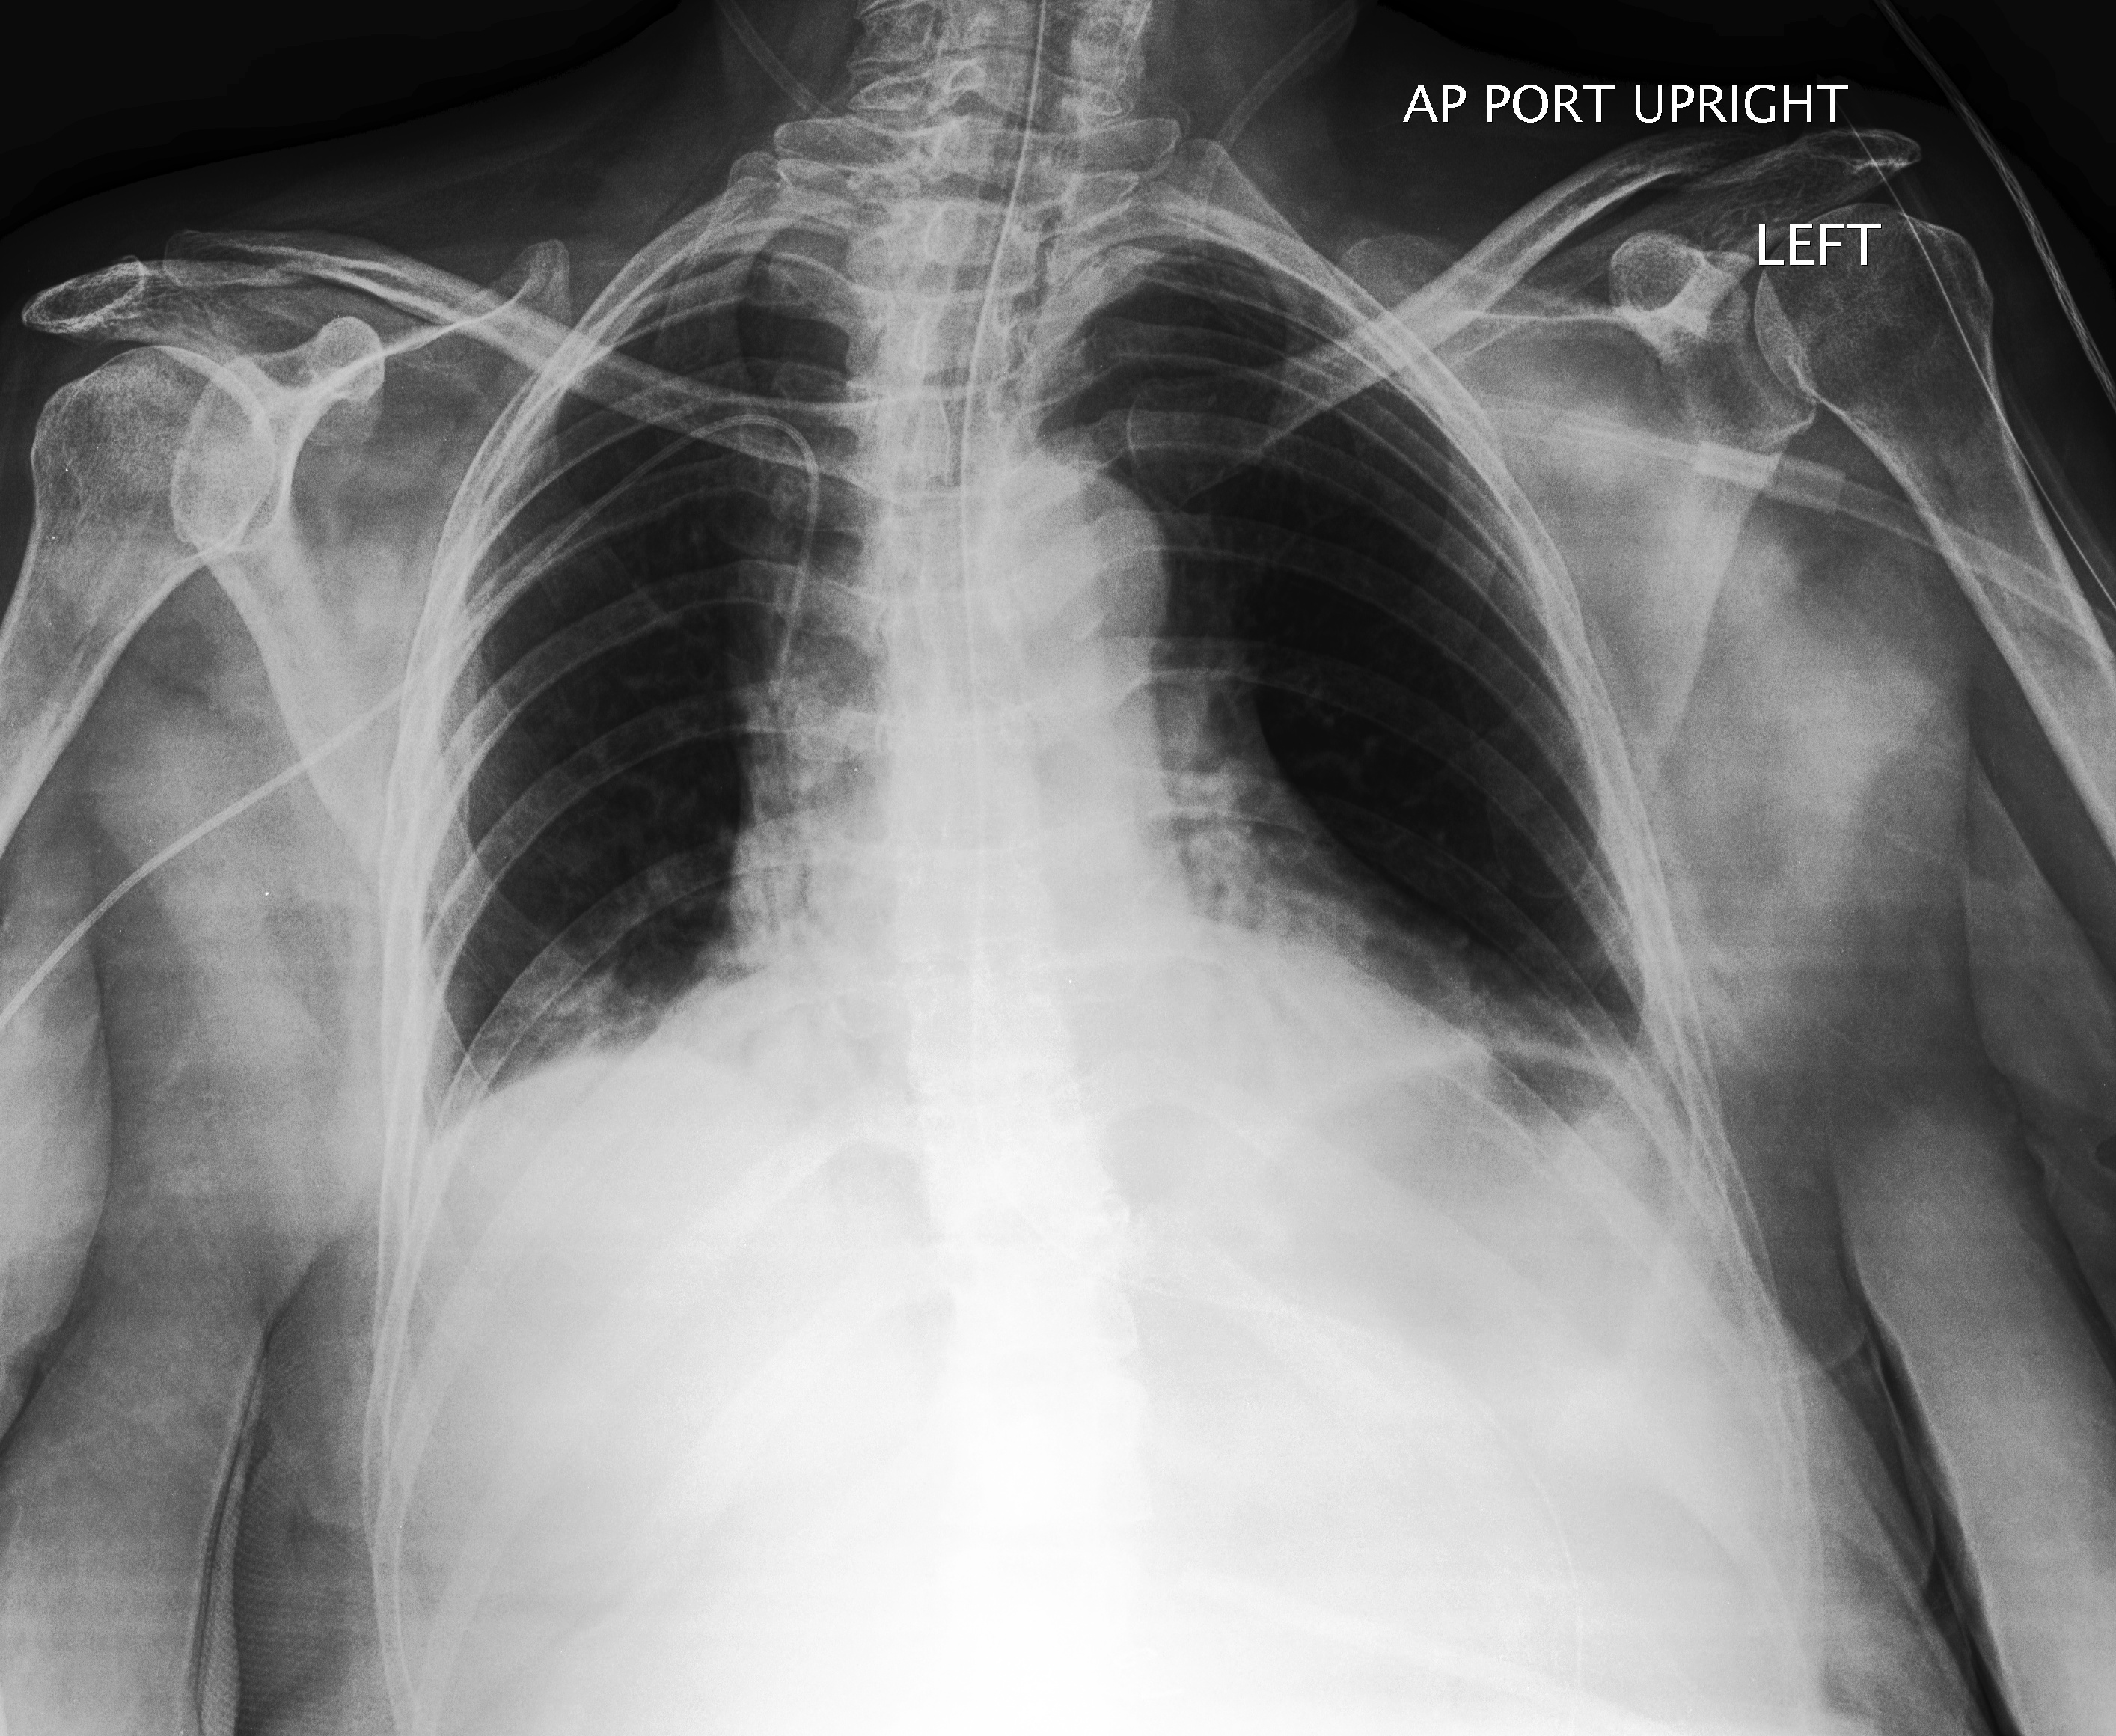

In [10]:
img_large

In [11]:
width = 10
height = 10

curr = cv2.resize(train_imgs[0], (width, height))

print(curr.shape)
print(curr)

img = Image.fromarray(curr, 'L')

(10, 10)
[[ 11   8   8  51 144  74  22 255   4   8]
 [ 22 111  79 108 177  87  93  61 154  21]
 [105 127 166  95 146  66  68 170  88 152]
 [138 172  43  32 185  70  16 126 110 132]
 [106 188  44  32 207 158  15 106 154  55]
 [ 84 151  44 167 216 208  88  60 122  82]
 [111 156 197 218 238 215 183 170  76  50]
 [ 77  92 194 231 238 227 215 197  78 101]
 [109  87 201 238 250 237 225 212 169 146]
 [146  98 196 239 253 247 241 228 189 143]]


In [12]:
img

In [13]:
tensor_train = []
tensor_test = []
tensor_solution = []

In [14]:
for i in range(0, len(train_imgs)):
    train_imgs[i] = cv2.resize(train_imgs[i], (width, height))
    train_imgs[i] = train_imgs[i]/255
    tensor_train.append(tf.convert_to_tensor(train_imgs[i], dtype=float))
    
for i in range(0, len(test_imgs)):
    test_imgs[i] = cv2.resize(test_imgs[i], (width, height))
    test_imgs[i] = test_imgs[i]/255
    tensor_test.append(tf.convert_to_tensor(test_imgs[i], dtype=float))

    
for i in range(0, len(solution_imgs)):
    solution_imgs[i] = cv2.resize(solution_imgs[i], (width, height))
    solution_imgs[i] = solution_imgs[i]/255
    tensor_solution.append(tf.convert_to_tensor(solution_imgs[i], dtype=float))

print(train_imgs)

[array([[0.04313725, 0.03137255, 0.03137255, 0.2       , 0.56470588,
         0.29019608, 0.08627451, 1.        , 0.01568627, 0.03137255],
        [0.08627451, 0.43529412, 0.30980392, 0.42352941, 0.69411765,
         0.34117647, 0.36470588, 0.23921569, 0.60392157, 0.08235294],
        [0.41176471, 0.49803922, 0.65098039, 0.37254902, 0.57254902,
         0.25882353, 0.26666667, 0.66666667, 0.34509804, 0.59607843],
        [0.54117647, 0.6745098 , 0.16862745, 0.1254902 , 0.7254902 ,
         0.2745098 , 0.0627451 , 0.49411765, 0.43137255, 0.51764706],
        [0.41568627, 0.7372549 , 0.17254902, 0.1254902 , 0.81176471,
         0.61960784, 0.05882353, 0.41568627, 0.60392157, 0.21568627],
        [0.32941176, 0.59215686, 0.17254902, 0.65490196, 0.84705882,
         0.81568627, 0.34509804, 0.23529412, 0.47843137, 0.32156863],
        [0.43529412, 0.61176471, 0.77254902, 0.85490196, 0.93333333,
         0.84313725, 0.71764706, 0.66666667, 0.29803922, 0.19607843],
        [0.30196078, 0.3607

In [15]:
y_train = []
for index, row in train_sub.iterrows():
    temp2 = [row['No Finding'], row['Enlarged Cardiomediastinum'], row['Cardiomegaly'],
            row['Lung Opacity'], row['Lung Lesion'], row['Edema'], row['Consolidation'],
            row['Pneumonia'], row['Atelectasis'], row['Pneumothorax'], row['Pleural Effusion'], 
            row['Pleural Other'], row['Fracture'], row['Support Devices']]
    i = 0 
    for val in temp2: 
        if val != val:
            temp2[i] = 0.0
        i += 1
    y_train.append(temp2)
    


In [16]:
X_train = train_imgs
y_train = np.array(y_train)

print(type(X_train[0][0]))
print()

<class 'numpy.ndarray'>



In [17]:
num_classes = 14

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=[width, height, 1]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(tensor_train)
model.fit(tensor_train, y_train, epochs=10, verbose=1)

[<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0.04313726, 0.03137255, 0.03137255, 0.2       , 0.5647059 ,
        0.2901961 , 0.08627451, 1.        , 0.01568628, 0.03137255],
       [0.08627451, 0.43529412, 0.30980393, 0.42352942, 0.69411767,
        0.34117648, 0.3647059 , 0.23921569, 0.6039216 , 0.08235294],
       [0.4117647 , 0.49803922, 0.6509804 , 0.37254903, 0.57254905,
        0.25882354, 0.26666668, 0.6666667 , 0.34509805, 0.59607846],
       [0.5411765 , 0.6745098 , 0.16862746, 0.1254902 , 0.7254902 ,
        0.27450982, 0.0627451 , 0.49411765, 0.43137255, 0.5176471 ],
       [0.41568628, 0.7372549 , 0.17254902, 0.1254902 , 0.8117647 ,
        0.61960787, 0.05882353, 0.41568628, 0.6039216 , 0.21568628],
       [0.32941177, 0.5921569 , 0.17254902, 0.654902  , 0.84705883,
        0.8156863 , 0.34509805, 0.23529412, 0.47843137, 0.32156864],
       [0.43529412, 0.6117647 , 0.77254903, 0.85490197, 0.93333334,
        0.84313726, 0.7176471 , 0.6666667 , 0.29803923, 0.1

Epoch 1/10


ValueError: in user code:

    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "sequential" expects 1 input(s), but it received 10 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 10) dtype=float32>]


In [21]:
# Simple neural network


# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(10,10)))
model.add(Dense(100, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

model.fit(tensor_train, y_train, epochs=10, verbose=1)

Epoch 1/10


ValueError: in user code:

    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ssaikuma/.local/lib/python3.7/site-packages/keras/engine/input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "sequential_4" expects 1 input(s), but it received 10 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 10) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 10) dtype=float32>]


In [ ]:

print(X_train)
print(y_train.shape)